In [2]:
import numpy as np

cluster_centers=np.load('cluster_centers.npy')

In [7]:
import numpy as np

# Load cluster centers
cluster_centers = np.load('cluster_centers.npy')  # shape: (n_clusters, dim)

# Normalize in case they aren't already unit vectors
cluster_centers = cluster_centers / np.linalg.norm(cluster_centers, axis=1, keepdims=True)

# Compute cosine similarity matrix
cos_sim = cluster_centers @ cluster_centers.T  # shape: (n_clusters, n_clusters)

# Clamp to [-1, 1] to avoid numerical issues with arccos
cos_sim = np.clip(cos_sim, -1.0, 1.0)

# Convert to angles in radians
angles_rad = np.arccos(cos_sim)  # [0, pi]

# Also in degrees if you'd like
angles_deg = np.degrees(angles_rad)

# Print angle matrix
print("Pairwise angles between cluster centers (degrees):")
print(np.round(angles_deg, 2))


Pairwise angles between cluster centers (degrees):
[[  0.    76.89 106.86  82.15  84.97]
 [ 76.89   0.    90.17  87.07  78.82]
 [106.86  90.17   0.   100.34  90.68]
 [ 82.15  87.07 100.34   0.    86.91]
 [ 84.97  78.82  90.68  86.91   0.  ]]


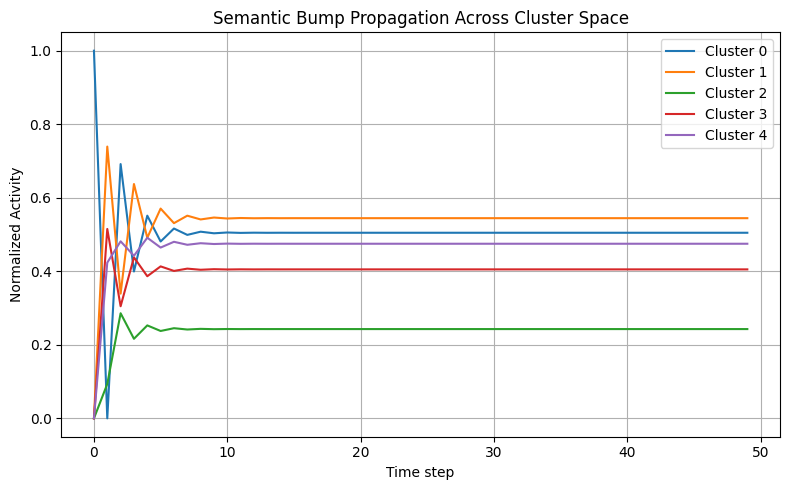

In [5]:
# Re-run after environment reset

import numpy as np
import matplotlib.pyplot as plt

# === Load Cluster Centers ===
cluster_centers = np.load("cluster_centers.npy")  # Assumed shape: (5, d)
n_clusters = cluster_centers.shape[0]

# === Normalize Vectors ===
cluster_centers = cluster_centers / np.linalg.norm(cluster_centers, axis=1, keepdims=True)

# === Compute Pairwise Angles ===
cos_sim = np.clip(cluster_centers @ cluster_centers.T, -1.0, 1.0)
angles_deg = np.degrees(np.arccos(cos_sim))

# === Build Recurrent Weight Matrix ===
kappa = 4.0  # Sharpness of bump
W = np.exp(kappa * np.cos(np.radians(angles_deg)))
np.fill_diagonal(W, 0)  # optional: remove self-connections

# === Simulate Activity Bump Over Time ===
timesteps = 50
activity = np.zeros((timesteps, n_clusters))
activity[0, 0] = 1.0  # Initial activation at cluster 0

# Simple bump dynamics: a[t+1] = W @ a[t], normalized
for t in range(1, timesteps):
    activity[t] = W @ activity[t - 1]
    activity[t] /= np.linalg.norm(activity[t] + 1e-6)

# === Plot Activity Over Time ===
plt.figure(figsize=(8, 5))
for i in range(n_clusters):
    plt.plot(activity[:, i], label=f"Cluster {i}")
plt.title("Semantic Bump Propagation Across Cluster Space")
plt.xlabel("Time step")
plt.ylabel("Normalized Activity")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
